Vamos a recapitular y organizar las cosas un poco más.

Para simular el campo electromagnético utilizando el método FDTD, se debe proporcionar tanto la permitividad como la permeabilidad relativas del medio. Esto supone el punto que acopla o une ambos lados de la simulación: el campo electromagnético y el fluido. Para baja intensidades del campo electromagnético, es razonable asumir que el fluido no se ve afectado por el campo electromagnético. Además, debido a las escalas de tiempo de ambas partes de la simulación, (la velocidad de la luz es varios órdenes de magnitud mayor que la velocidad del sonido en cualquier medio) se puede asumir en la mayoría de casos que el fluido es estático con respecto a la propagación de ondas.

De esta forma se pueden esbozar tres pasos para la simulación: simular el fluido, transformar las variables del fluido en permeabilidad y permitividad, y por ultimo simular el campo electromagnético. Sin embargo, una simulación completa del fluido utilizando por ejemplo las ecuaciones de Navier-Stokes puede no ser estrictamente necesárea, ya que muchas de las características de la turbulencia pueden capturarse utilizando campos aleatorios.

Para obtener la permeabilidad y permitividad se puede trabajar con las variables macroscópicas del fluido. Derivar la permeabilidad y permitividad de propiedades microscópicas se discutirá más adelante. Suponiendo que el fluido no es magnético en las condiciones a trabajar, se puede tomar $\mu_r \approx 1$ y por lo tanto:

$$
n = \sqrt{\epsilon_r \mu_r} \approx \sqrt{\epsilon_r} \Rightarrow \epsilon_r = n^2
$$

Inicialmente y por sencillez, se modelará el índice de refracción como un campo aleatório. Para informar el valor del indice y su distribución para condiciones comúnmente encontradas se pueden usar las fórmulas encontradas en Ciddor y Mathar. Una fórmula más simple puede encontrarse en Sasiela:

$$
    n - 1 = 77.6\times10^{-6}(1 + 7.52\times10^{-3}/\lambda^2)\left(\frac{P}{T}\right)
$$

Donde $\lambda$ es la longitud de onda, P es la presión en milibares y T es la temperatura en grados Kelvin. Con esta fórmula se puede representar la permitividad en función de los parámetros de presión y temperatura.

In [1]:
import matplotlib.pyplot as plt

import fdtd
import numpy as np
import scipy as sc

import helpers

Para longitud de onda 7.5e-07, esta estimación da un promedio de n-1 de 0.0005484355989790564, con una desviación estandard de 1.7337928507741522e-05


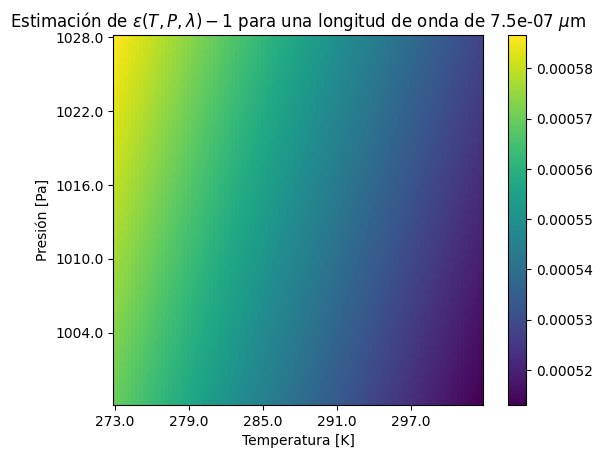

In [2]:
res = 100

l = 0.75e-6

# temperatura cambia en la x
T = np.array([np.linspace(273, 273+30, res) for _ in range(res)])
# presión cambia en la y (se hace una transposición)
P = np.array([np.linspace(1013.25+15, 1013.25-15, res) for _ in range(res)]).T

perm_menos_uno = helpers.permitivity_sasiela(l*2e6, T, P) - 1

print(f"Para longitud de onda {l}, esta estimación da un promedio de n-1 de {np.mean(perm_menos_uno)}, con una desviación estandard de {np.std(perm_menos_uno)}")

plt.imshow(perm_menos_uno)
plt.colorbar()

plt.xlabel("Temperatura [K]")
plt.ylabel("Presión [Pa]")

plt.xticks([i for i in range(0, len(T), len(T)//5)], np.round(T[0][::len(T)//5], 0))
plt.yticks([i for i in range(0, len(P), len(P)//5)], np.round(P.T[0][::len(P)//5], 0))

plt.title(r"Estimación de $\epsilon(T, P, \lambda) - 1$ para una longitud de onda de " + f"{l}" + r" $\mu$m")

plt.savefig("figures/estimacion_perm_075.png")

Para longitud de onda 1.5e-05, esta estimación da un promedio de n-1 de 0.0005466130292105185, con una desviación estandard de 1.7280302952490985e-05


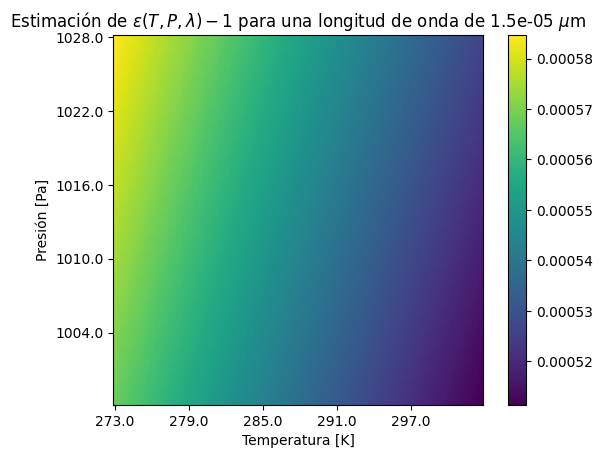

In [3]:
res = 100

l = 15e-6

# temperatura cambia en la x
T = np.array([np.linspace(273, 273+30, res) for _ in range(res)])
# presión cambia en la y (se hace una transposición)
P = np.array([np.linspace(1013.25+15, 1013.25-15, res) for _ in range(res)]).T

perm_menos_uno = helpers.permitivity_sasiela(l*2e6, T, P) - 1

print(f"Para longitud de onda {l}, esta estimación da un promedio de n-1 de {np.mean(perm_menos_uno)}, con una desviación estandard de {np.std(perm_menos_uno)}")

plt.imshow(perm_menos_uno)
plt.colorbar()

plt.xlabel("Temperatura [K]")
plt.ylabel("Presión [Pa]")

plt.xticks([i for i in range(0, len(T), len(T)//5)], np.round(T[0][::len(T)//5], 0))
plt.yticks([i for i in range(0, len(P), len(P)//5)], np.round(P.T[0][::len(P)//5], 0))

plt.title(r"Estimación de $\epsilon(T, P, \lambda) - 1$ para una longitud de onda de " + f"{l}" + r" $\mu$m")

plt.savefig("figures/estimacion_perm_15.png")

1.000152587665698 1.4005334950346277e-05


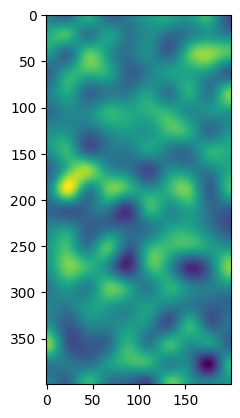

In [4]:
p = helpers.create_patch_permitivity(shape=(20, 10, 1), final_shape=(400, 200, 1))

print(np.mean(p), np.std(p))

plt.imshow(p)
plt.show()

1.000150349241236 1.7076640247296823e-05


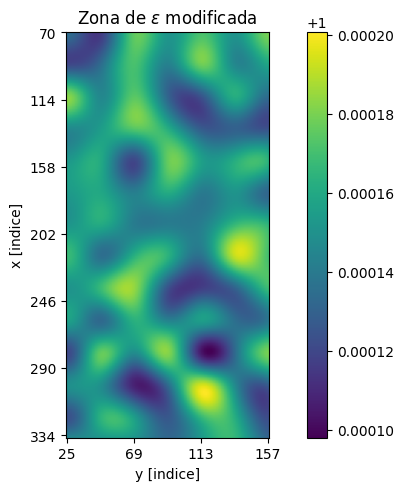

In [5]:
longitud_onda = 2e-6

mean_perm = 1+1.5e-4
std_perm = 1.72e-5

p = helpers.create_patch_permitivity(shape=(20, 10, 1), final_shape=(400, 200, 1))

# Corta el patch dado
p = p[0:p.shape[0]*2//3, 0:p.shape[1]*2//3]

print(np.mean(p), np.std(p))

fig, ax = plt.subplots(constrained_layout=True)

ax.set_xlabel("y [indice]")
ax.set_ylabel("x [indice]")

ax.set_xticks([i for i in range(0, p.shape[1], p.shape[1]//3)], [i for i in range(25, 25+p.shape[1], p.shape[1]//3)])
ax.set_yticks([i for i in range(0, p.shape[0], p.shape[0]//6)], [i for i in range(70, 70+p.shape[0], p.shape[0]//6)])

im = ax.imshow(p)
ax.set_title(r"Zona de $\epsilon$ modificada")

plt.colorbar(im)
plt.savefig("figures/perm_aletoria.png")

grid1 = helpers.set_up_grid(longitud_onda, ancho_fuente=1.0, perm=mean_perm, patch=p)
grid2 = helpers.set_up_grid(longitud_onda, ancho_fuente=1.0, perm=mean_perm)

In [6]:
# Crea tambien la función de correlación

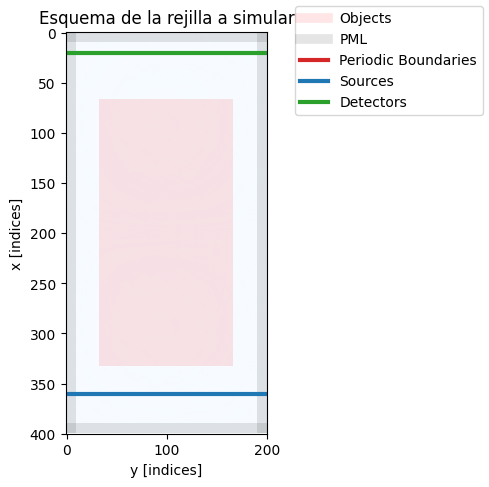

In [7]:
grid1.visualize(z=0, show=False)

plt.title("Esquema de la rejilla a simular")

plt.xlabel("y [indices]")
plt.ylabel("x [indices]")

plt.savefig("figures/setup_2d_1.png")

In [8]:
tiempo_total = 800

grid1.run(tiempo_total)
grid2.run(tiempo_total)

  0%|          | 0/800 [00:00<?, ?it/s]

100%|██████████| 800/800 [00:08<00:00, 96.97it/s] 


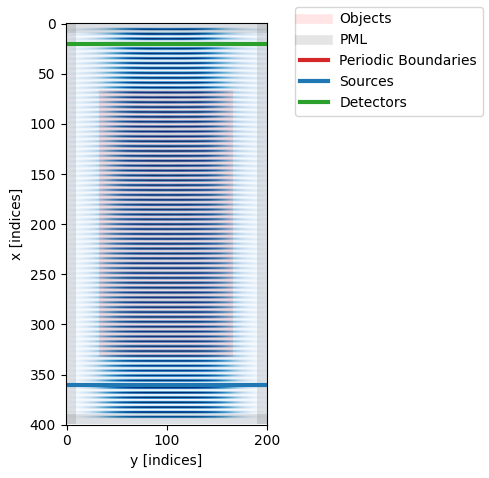

In [9]:
grid1.visualize(z=0, show=False)

# plt.title("Esquema de la rejilla a simular una vez realizada la simulación")

plt.xlabel("y [indices]")
plt.ylabel("x [indices]")

plt.savefig("figures/setup_2d_2.png")

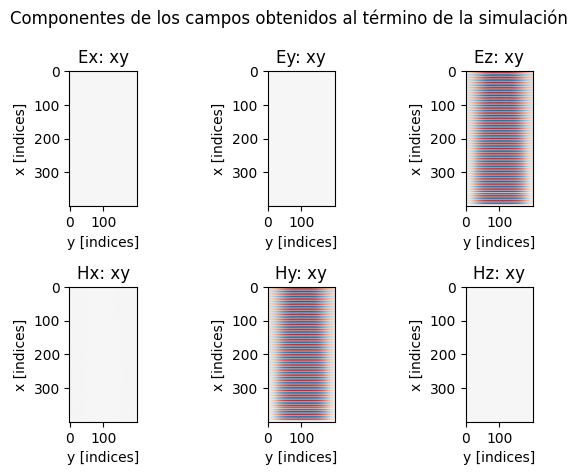

In [10]:
fig, axes = plt.subplots(2, 3, squeeze=False)
titles = ["Ex: xy", "Ey: xy", "Ez: xy", "Hx: xy", "Hy: xy", "Hz: xy"]

fields = np.stack(
    [
        grid1.E[:, :, 0, 0],
        grid1.E[:, :, 0, 1],
        grid1.E[:, :, 0, 2],
        grid1.H[:, :, 0, 0],
        grid1.H[:, :, 0, 1],
        grid1.H[:, :, 0, 2],
    ]
)

m = max(abs(fields.min().item()), abs(fields.max().item()))

for ax, field, title in zip(axes.ravel(), fields, titles):
    # ax.set_axis_off()
    ax.set_title(title)
    ax.imshow(np.array(field), vmin=-m, vmax=m, cmap="RdBu")
    ax.set_xlabel("y [indices]")
    ax.set_ylabel("x [indices]")

fig.suptitle("Componentes de los campos obtenidos al término de la simulación")
fig.tight_layout()

plt.savefig("figures/campos_fin.png")

In [11]:
# Cuadrado del Log del ratio de las amplitudes máximas
A1 = helpers.get_amplitude_detector_data(grid1)
A2 = helpers.get_amplitude_detector_data(grid2)

print(np.log(A1/A2)**2)

9.255652377777138e-08


La densidad de energía del campo electromagnético es: 

$$
    u = \frac{1}{2} \left(\epsilon E^2 + \frac{1}{\mu} B\right)
$$

Teniendo en cuenta que en general $c = \frac{1}{\sqrt{\epsilon_0 \mu_0}}$ y en el caso considerado $\mu = \mu_0$, se puede simplificar la expresión:

$$
    u = \frac{1}{2} \left(\epsilon E^2 + \frac{1}{\mu} B\right) = \frac{1}{2} \epsilon \left(\epsilon_r E^2 + \frac{1}{\epsilon_0\mu_0} B\right) 
$$

Por otro lado en términos de $\vec H$:

$$
    u = \frac{1}{2} \left(\epsilon E^2 + \mu H^2 \right) = \frac{1}{2} \left(\epsilon E^2 + \mu_0 H^2 \right) = \frac{1}{2} \epsilon_0 \left(\epsilon_r E^2 +  \frac{1}{\eta^2_0} H^2 \right)
$$

Donde $\eta_0 = \sqrt \frac{\epsilon_0}{\mu_0}$ es la impedancia característica del espacio vacío, medida en Ohmnios. Como tiene un valor constante de $\eta_0 = 377.0$ será posible despreciar el cámpo magnético en el cálculo energético, al ser ambos campos de similar orden de magnitud.

586 600 14
3.207174839103948e-05 3.207191313805307e-05 -6.469981640222332e-05


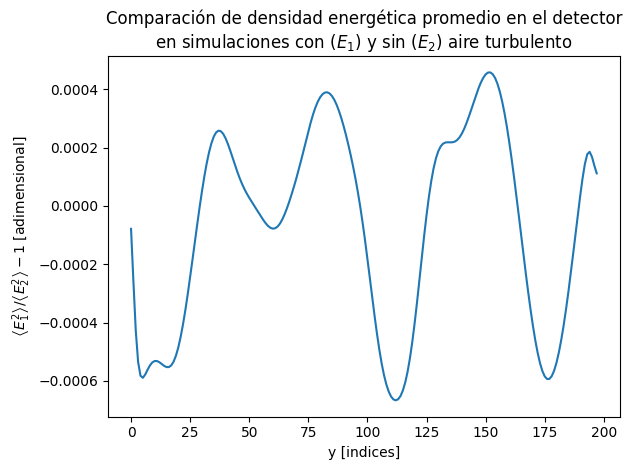

In [12]:
# Tamaño de la ventana con la que hacer el promedio
tamaño = grid1.sources[0].period#*10 # un orden de magnitud mayor que el periodo de la onda
offset = 200

inital = tiempo_total - offset - tamaño
final = tiempo_total - offset

print(inital, final, tamaño)

magnitud_detector_E1 = helpers.get_average_detector_data(grid1, inital, final)[1:-1]
magnitud_detector_E2 = helpers.get_average_detector_data(grid2, inital, final)[1:-1]

# Dividiendo las dos cantidades, es posible abstraer las unidades del problema
# Se puede esperar que el ratio sea siempre menor o igual a uno, ya que los pequeños cambios del indice deben disipar algo de energía
r = magnitud_detector_E1/magnitud_detector_E2 - 1
print(np.mean(magnitud_detector_E1), np.mean(magnitud_detector_E2), np.mean(r)) # La diferencia de las medias es más pequeña que el ruido de la simulación
plt.plot(r)

plt.title("Comparación de densidad energética promedio en el detector\n"+r"en simulaciones con ($E_1$) y sin ($E_2$) aire turbulento")
plt.xlabel("y [indices]")
plt.ylabel(r"$\left\langle E_1^2 \right\rangle/ \left\langle E_2^2 \right\rangle - 1$" + " [adimensional]")

plt.tight_layout()

plt.savefig("figures/comparacion_2d.png")

In [13]:
tamaño = grid1.sources[0].period*10 # un orden de magnitud mayor que el periodo de la onda

to_plot = list()

for offset in range(50, 320, 20):
    inital = tiempo_total - offset - tamaño
    final = tiempo_total - offset

    magnitud_detector_E1 = helpers.get_average_detector_data(grid1, inital, final)[1:-1]
    magnitud_detector_E2 = helpers.get_average_detector_data(grid2, inital, final)[1:-1]

    r = magnitud_detector_E1/magnitud_detector_E2 - 1

    to_plot.append(r)

(<Figure size 1200x800 with 1 Axes>,
 <Axes: title={'center': 'Ridge Plot'}, xlabel='X', ylabel='Series'>)

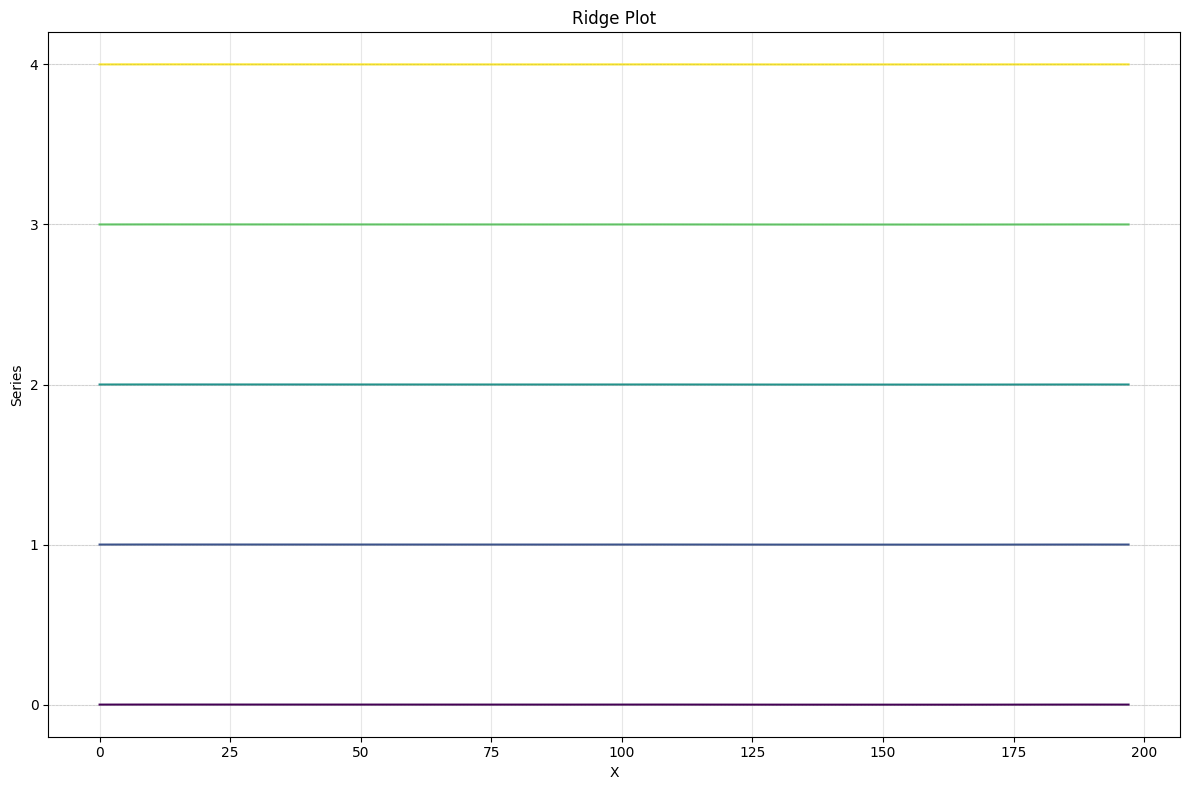

In [16]:
# No funciona bien porque los ejes estan configurados mal
from representaciones import create_ridge_plot

create_ridge_plot(to_plot)

(<Figure size 1200x800 with 2 Axes>,
 <Axes3D: title={'center': 'Surface Ridge Plot'}, xlabel='X', ylabel='Y', zlabel='Z'>)

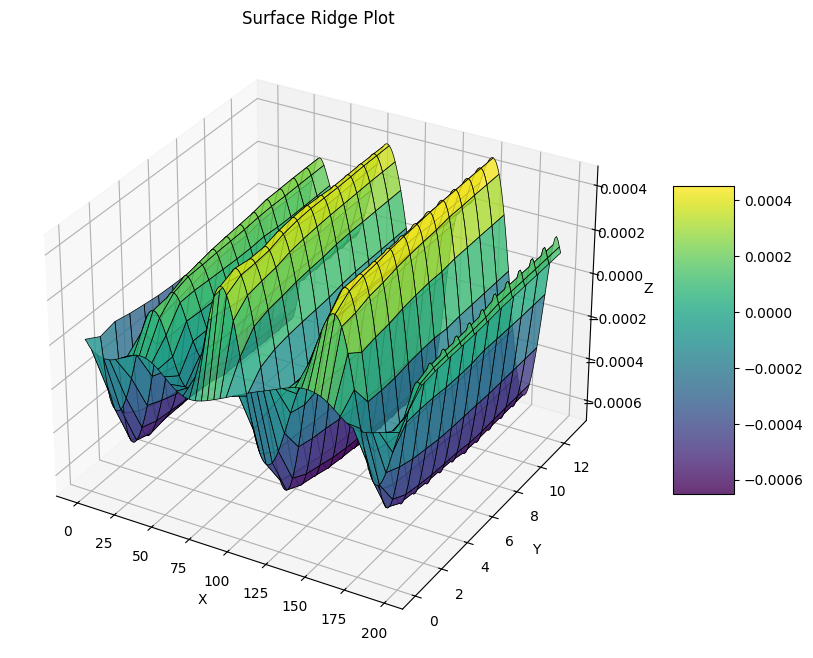

In [14]:
from representaciones import create_surface_ridge

create_surface_ridge(to_plot[::-1])

In [15]:
total_energia1 = sc.integrate.trapezoid(magnitud_detector_E1)
print(f"2U_1/epsilon = {total_energia1}")
total_energia2 = sc.integrate.trapezoid(magnitud_detector_E2)
print(f"2U_2/epsilon = {total_energia2}")
print(f"Ratio: {total_energia1/total_energia2}")

2U_1/epsilon = 2.6127206187995618e-05
2U_2/epsilon = 2.61277912415777e-05
Ratio: 0.9999776079969152


In [16]:
# Repite varias veces para encontrar un promedio bajo diferentes turbulencias con la misma escala

longitud_onda = 2e-6    

mean_perm = 1+1.5e-4
std_perm = 1.72e-5
tiempo_total = 650

energy_density_ratios = list()
mean_energy_ratios = list()
p_list = list()

s = (200, 100, 1)

# Grid sin nada es siempre igual
grid2 = helpers.set_up_grid(longitud_onda, ancho_fuente=1.0, shape=s, perm=mean_perm)
grid2.run(tiempo_total)
magnitud_detector_E2 = helpers.get_average_detector_data(grid2, inital, final)[1:-1]
total_energia2 = sc.integrate.trapezoid(magnitud_detector_E2)

for _ in np.arange(10):
    p = helpers.create_patch_permitivity(shape=(100, 50, 1), final_shape=s)
    # Corta el patch dado
    p = p[0:p.shape[0]*2//3, 0:p.shape[1]*2//3]
    p_list.append(p)

    grid1 = helpers.set_up_grid(longitud_onda, ancho_fuente=1.0, shape=s, perm=mean_perm, patch=p)

    grid1.run(tiempo_total)

    tamaño = grid1.sources[0].period*10 # un orden de magnitud mayor que el periodo de la onda
    offset = 10

    inital = tiempo_total - offset - tamaño
    final = tiempo_total - offset

    magnitud_detector_E1 = helpers.get_average_detector_data(grid1, inital, final)[1:-1]

    energy_density_ratios.append(magnitud_detector_E1/magnitud_detector_E2 - 1)

    total_energia1 = sc.integrate.trapezoid(magnitud_detector_E1)

    mean_energy_ratios.append(1 - total_energia1/total_energia2)

100%|██████████| 650/650 [00:01<00:00, 480.95it/s]


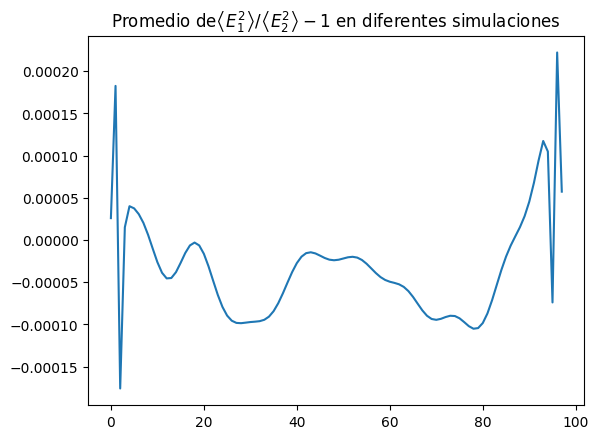

In [ ]:
energy_density_mean = np.average(np.array(energy_density_ratios), axis=0)

plt.plot(energy_density_mean)

plt.title("Promedio de " + r"$\left\langle E_1^2 \right\rangle/ \left\langle E_2^2 \right\rangle - 1$" + " en diferentes simulaciones")
plt.show()

Energía total que llega al detector según el tamaño de las inhomogeneidades.

In [ ]:
longitud_onda = 2e-6    

mean_perm = 1+1.5e-4
std_perm = 1.72e-5
tiempo_total = 650

mean_energy_ratios = list()
p_list = list()

s = (200, 100, 1)

# Grid sin nada es siempre igual
grid2 = helpers.set_up_grid(longitud_onda, ancho_fuente=1.0, shape=s, perm=mean_perm)
grid2.run(tiempo_total)
magnitud_detector_E2 = helpers.get_average_detector_data(grid2, inital, final)[1:-1]
total_energia2 = sc.integrate.trapezoid(magnitud_detector_E2)

for x in np.arange(5, 100, 5):
    p = helpers.create_patch_permitivity(shape=(2*x, x, 1), final_shape=s)

    # Corta el patch dado
    p = p[0:p.shape[0]*2//3, 0:p.shape[1]*2//3]
    p_list.append(p)

    grid1 = helpers.set_up_grid(longitud_onda, ancho_fuente=1.0, shape=s, perm=mean_perm, patch=p)

    if x%20 == 0:
        print("Progreso", x)
    grid1.run(tiempo_total, progress_bar=False)

    tamaño = grid1.sources[0].period*10 # un orden de magnitud mayor que el periodo de la onda
    offset = 10

    inital = tiempo_total - offset - tamaño
    final = tiempo_total - offset

    magnitud_detector_E1 = helpers.get_average_detector_data(grid1, inital, final)[1:-1]

    total_energia1 = sc.integrate.trapezoid(magnitud_detector_E1)

    mean_energy_ratios.append(1 - total_energia1/total_energia2)

100%|██████████| 650/650 [00:01<00:00, 492.60it/s]


1.000149223668781 1.4431816999709349e-05


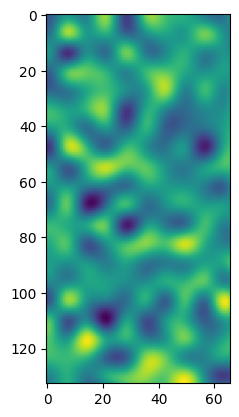

In [82]:
p = p_list[1]

print(np.mean(p), np.std(p))
plt.imshow(p)
plt.show()

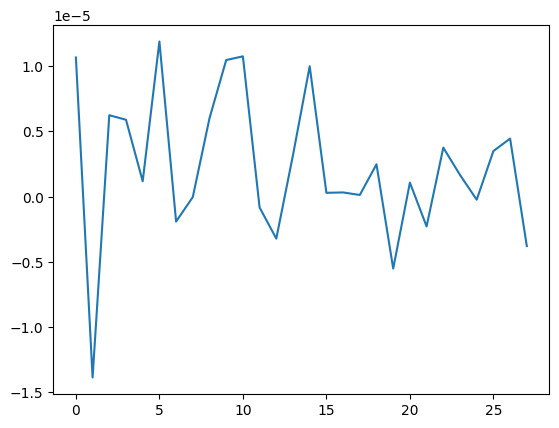

In [83]:
# plt.scatter(list(range(0, len(mean_energy_ratios))), mean_energy_ratios)
plt.plot(mean_energy_ratios)
plt.show()

In [ ]:
# Cuadrado del Log del ratio de las amplitudes máximas
# Esta simulación tarda mucho, abajo puedes cargar un .txt con los datos
longitud_onda = 2e-6    

mean_perm = 1+1.5e-4
std_perm = 1.72e-5
tiempo_total = 650

square_log_amplitudes = list()
p_list = list()

s = (200, 100, 1)

# Grid sin nada es siempre igual
grid2 = helpers.set_up_grid(longitud_onda, ancho_fuente=1.0, shape=s, perm=mean_perm)
grid2.run(tiempo_total)
A2 = helpers.get_amplitude_detector_data(grid2)

for x in np.arange(5, 100, 5):
    current_size = list()
    for _ in range(10): # Corre cada tamaño varias veces para encontrar una distribución
        p = helpers.create_patch_permitivity(shape=(2*x, x, 1), final_shape=s)

        # Corta el patch dado
        p = p[0:p.shape[0]*2//3, 0:p.shape[1]*2//3]
        p_list.append(p)

        grid1 = helpers.set_up_grid(longitud_onda, ancho_fuente=1.0, shape=s, perm=mean_perm, patch=p)

        grid1.run(tiempo_total, progress_bar=False)

        tamaño = grid1.sources[0].period*10 # un orden de magnitud mayor que el periodo de la onda
        offset = 10

        inital = tiempo_total - offset - tamaño
        final = tiempo_total - offset

        A1 = helpers.get_amplitude_detector_data(grid1)

        current_size.append(np.log(A1/A2)**2)
        
    if x%20 == 0:
        print("Progreso", x)

    square_log_amplitudes.append(current_size)

100%|██████████| 650/650 [00:01<00:00, 478.79it/s]


Progreso 20
Progreso 40
Progreso 60
Progreso 80


1.000150052615238 1.5040190776121758e-05


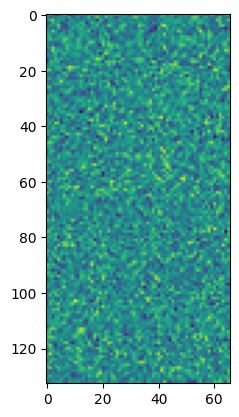

In [43]:
p = p_list[::10][-1]

print(np.mean(p), np.std(p))
plt.imshow(p)
plt.show()

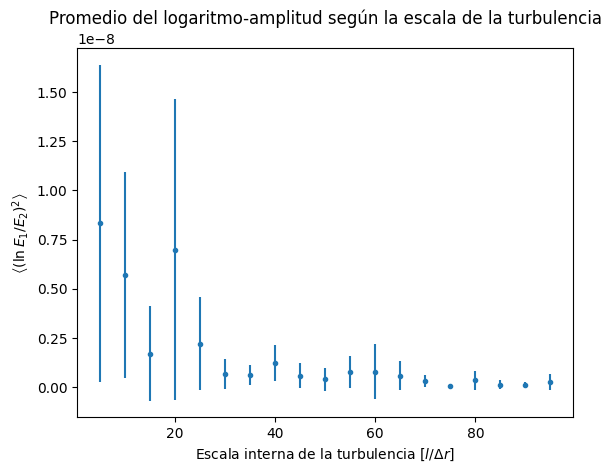

In [54]:
square_log_amplitudes_means = [np.mean(s) for s in square_log_amplitudes]
square_log_amplitudes_stds = [np.std(s) for s in square_log_amplitudes]

# plt.plot(square_log_amplitudes_means)
plt.errorbar(np.arange(5, 100, 5), square_log_amplitudes_means, yerr=square_log_amplitudes_stds, fmt=".")

plt.title("Promedio del logaritmo-amplitud según la escala de la turbulencia")

plt.ylabel(r"$\left\langle (\ln E_1/E_2)^2 \right\rangle$")
plt.xlabel("Escala interna de la turbulencia " + r"[$l/\Delta r$]")

plt.savefig("figures/log-amplitude.png")

In [ ]:
# Como la simulación tarda mucho, guarda los datos en .txt
np.savetxt("log-amplitud1.txt", np.array(square_log_amplitudes))

square_log_amplitudes = np.loadtxt("log-amplitud1.txt")

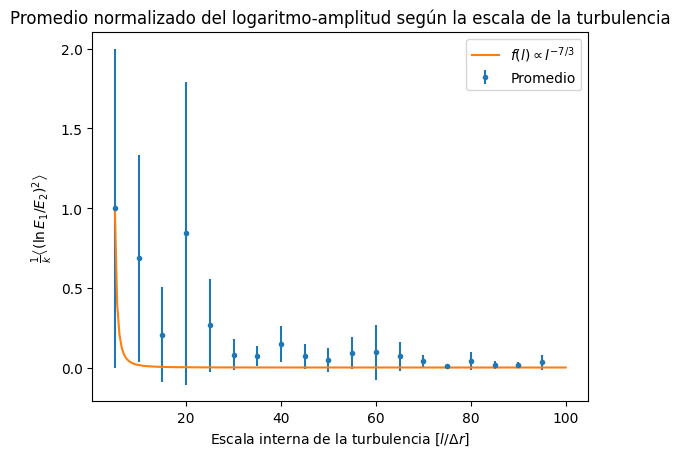

In [55]:
# Lo mismo normalizado y junto con la relación que debería seguir
square_log_amplitudes_means = np.array([np.mean(s) for s in square_log_amplitudes])
square_log_amplitudes_stds = np.array([np.std(s) for s in square_log_amplitudes])

square_log_amplitudes_means = square_log_amplitudes_means/square_log_amplitudes_means.max()
square_log_amplitudes_stds = square_log_amplitudes_stds/square_log_amplitudes_stds.max()

plt.errorbar(np.arange(5, 100, 5), square_log_amplitudes_means, yerr=square_log_amplitudes_stds, fmt=".", label="Promedio")

l = np.linspace(5, 100, 200)
plt.plot(l, (l-4)**(-7/3), label=r"$f(l) \propto l^{-7/3}$") # Al normalizar tenemos que vale uno en 5, hacemos lo mismo con lo que tiene que valer

plt.title("Promedio normalizado del logaritmo-amplitud según la escala de la turbulencia")

plt.ylabel(r"$\frac{1}{k}\left\langle (\ln E_1/E_2)^2 \right\rangle$")
plt.xlabel("Escala interna de la turbulencia " + r"[$l/\Delta r$]")

plt.legend()

plt.savefig("figures/log-amplitude_norm.png")

Para simular mejor ondas planas, es posible cambiar uno de los contornos por contornos periódicos

In [34]:
def set_up_grid(longitud_onda:float, shape=(400, 200, 1), ancho_fuente=0.5,  perm=1.0005441500841912, patch=None):
    """
    Inicializa la grid de FDTD con un valor constante de permitividad dado. Opcionalmente coloca una sección de aire con otra permitividad.
    La grid creada tiene como condiciones de contorno PLM (perfectly matched layer), que son una forma de implementar condiciones de contorno absorbentes. 
    Además la grid tiene una fuente con la longitud de onda dada y un detector
    Ancho fuente: ancho de la fuente como fracción del dominio
    """
    # para longitud de onda: debe ser en  metros -> el spacing debe ser 10 veces menor que la longitud de onda para tener estabilidad
    grid = fdtd.Grid(
        shape = shape, # Dando el último valor como uno se crea una grid de dos dimensiones
        permittivity=perm,
        grid_spacing=longitud_onda*0.1
    )
    # Si se da un patch, ponerlo en la grid
    if patch is not None:
        tamaño_x, tamaño_y = patch.shape[:2]
        # Offsets para que esté centrado en x e y
        offset_x = (grid.shape[0] - tamaño_x)//2
        offset_y = (grid.shape[1] - tamaño_y)//2
        grid[offset_x:offset_x+tamaño_x, offset_y:offset_y+tamaño_y, 0] = fdtd.Object(permittivity=patch, name="Aire turbulento")

    # Añadimos una fuente con perfil gaussiano dado el tamaño, centrada en la mitad de x
    tamaño_y = int(grid.shape[1]*ancho_fuente)
    offset_y = (grid.shape[1] - tamaño_y)//2
    # tamaño_y = grid.shape[1]*1//10
    # offset_y = grid.shape[1]*9//20

    grid[grid.shape[0]-40, offset_y:offset_y+tamaño_y, 0] = fdtd.LineSource(
        period = longitud_onda / (3e8), name="Fuente", amplitude=2.
    ) # 20:80
    # Añadimos un detector
    grid[20, :, 0] = fdtd.LineDetector(name="detector")

    # Añade PLM en los contornos de la x
    grid[0:10, :, :] = fdtd.PML(name="pml_xlow")
    grid[-10:, :, :] = fdtd.PML(name="pml_xhigh")

    # añade contornos periodicos en la y
    grid[:, 0, :] = fdtd.PeriodicBoundary(name="ybounds")
        
    return grid

1.000153220433968 1.5036606959412938e-05


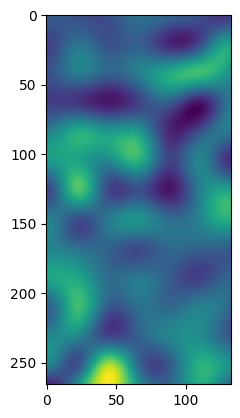

In [35]:
longitud_onda = 2e-6

mean_perm = 1+1.5e-4
std_perm = 1.72e-5

p = helpers.create_patch_permitivity(shape=(20, 10, 1), final_shape=(400, 200, 1))

# Corta el patch dado
p = p[0:p.shape[0]*2//3, 0:p.shape[1]*2//3]

print(np.mean(p), np.std(p))

plt.imshow(p)
plt.show()

grid1 = set_up_grid(longitud_onda, ancho_fuente=1.0, perm=mean_perm, patch=p)
grid2 = set_up_grid(longitud_onda, ancho_fuente=1.0, perm=mean_perm)

100%|██████████| 800/800 [00:07<00:00, 113.10it/s]


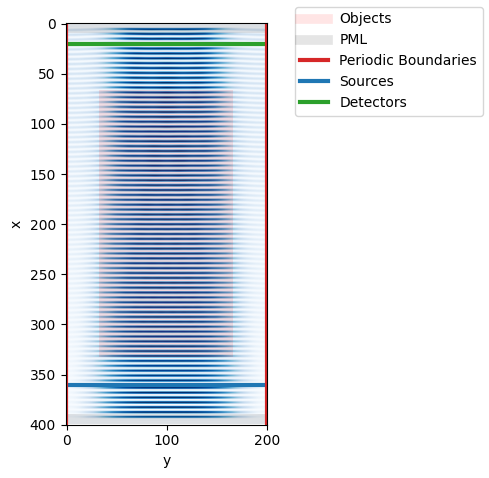

In [36]:
tiempo_total = 800

grid1.run(tiempo_total)
grid2.run(tiempo_total)

grid1.visualize(z=0)

586 600 14
3.229026722489202e-05 3.229040753696244e-05 -8.071837092923329e-05


Text(0.5, 1.0, '$\\left\\langle E_1^2 \\right\\rangle/ \\left\\langle E_2^2 \\right\\rangle - 1$')

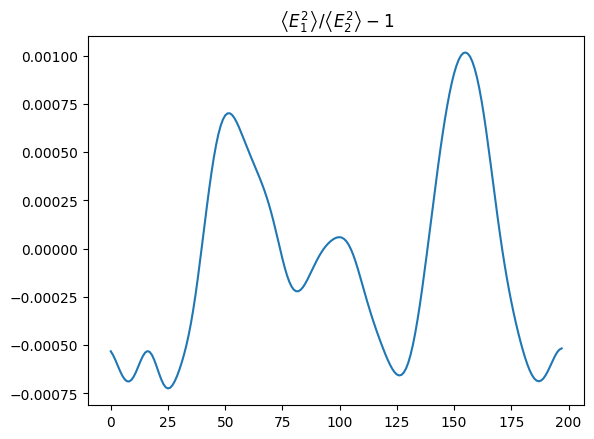

In [ ]:
# Tamaño de la ventana con la que hacer el promedio
tamaño = grid1.sources[0].period#*10 # un orden de magnitud mayor que el periodo de la onda
offset = 200

inital = tiempo_total - offset - tamaño
final = tiempo_total - offset

print(inital, final, tamaño)

magnitud_detector_E1 = helpers.get_average_detector_data(grid1, inital, final)[1:-1]
magnitud_detector_E2 = helpers.get_average_detector_data(grid2, inital, final)[1:-1]

# Dividiendo las dos cantidades, es posible abstraer las unidades del problema
# Se puede esperar que el ratio sea siempre menor o igual a uno, ya que los pequeños cambios del indice deben disipar algo de energía
r = magnitud_detector_E1/magnitud_detector_E2 - 1
print(np.mean(magnitud_detector_E1), np.mean(magnitud_detector_E2), np.mean(r)) # La diferencia de las medias es más pequeña que el ruido de la simulación
plt.plot(r)

plt.title(r"$\left\langle E_1^2 \right\rangle/ \left\langle E_2^2 \right\rangle - 1$")
plt.show()